# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

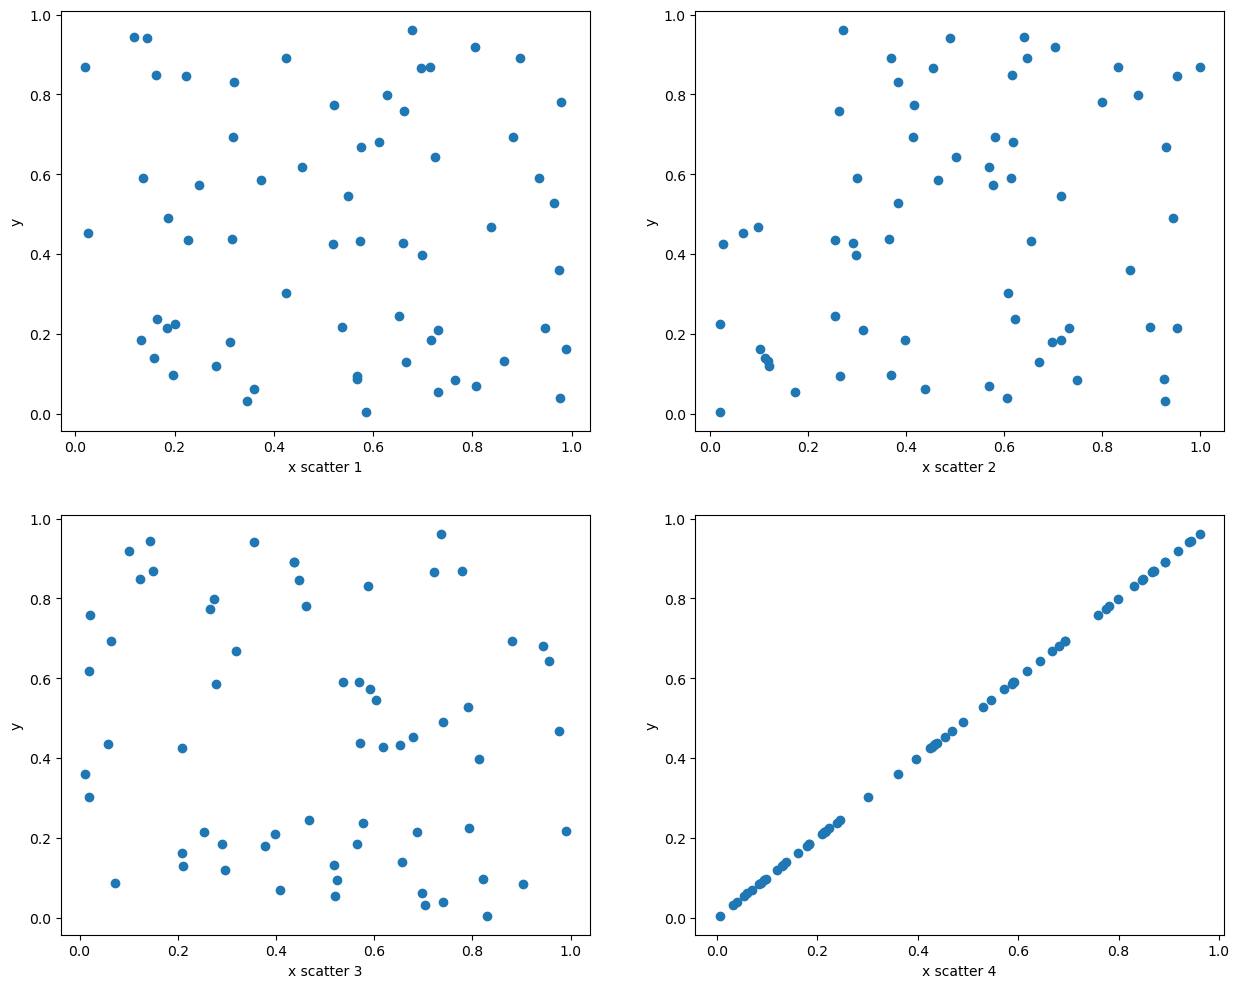

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#4D dataset
n = 64;
x = np.linspace(0, 1, n) + np.random.rand(4, n);
x = np.vstack([x, np.ones(len(x.T))]).T;
y = np.linspace(0, 1, n) + np.random.rand(n) - 1;

#Plots
plt.figure(figsize=(15,12))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.scatter(data[:, i], data[:, -1])
    plt.xlabel(f"x scatter {i+1}")
    plt.ylabel("y")

plt.show()


## 2.  Create a Linear Regression model (LIKE WE DID IN CLASS) to fit the data. *Use the example from Lesson 3 and DO NOT USE a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), calculate a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [10]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
np.dot(left, right)

my_model = np.linalg.lstsq(x, y, rcond=None)[0]
my_model


array([-0.11647018, -0.17950826,  0.14122151,  0.05866884,  0.55795118])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

Text(0.5, 1.0, 'Lots of Dots 1')

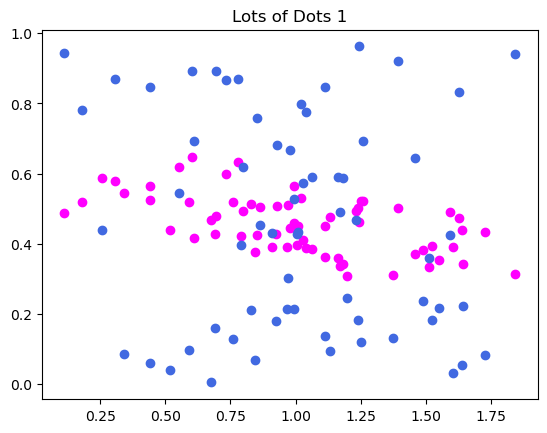

In [20]:
my_mod_vis = np.dot(x, my_model)

plt.scatter(x.T[0], my_mod_vis, c = "magenta")
plt.scatter(x.T[0], y, c = "royalblue")
plt.title("Lots of Dots 1")


Text(0.5, 1.0, 'Lots of Dots 2')

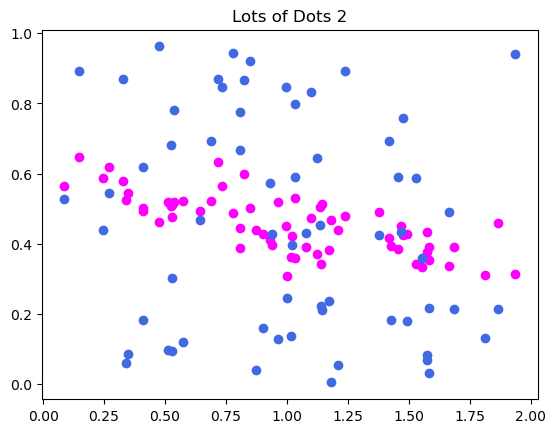

In [21]:
plt.scatter(x.T[1], my_mod_vis, c = "magenta")
plt.scatter(x.T[1], y, c = "royalblue")
plt.title("Lots of Dots 2")


Text(0.5, 1.0, 'Lots of Dots 3')

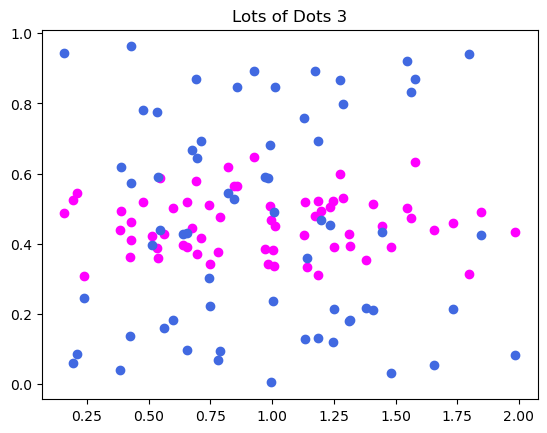

In [22]:
plt.scatter(x.T[2], my_mod_vis, c = "magenta")
plt.scatter(x.T[2], y, c = "royalblue")
plt.title("Lots of Dots 3")


Text(0.5, 1.0, 'Lots of Dots 4')

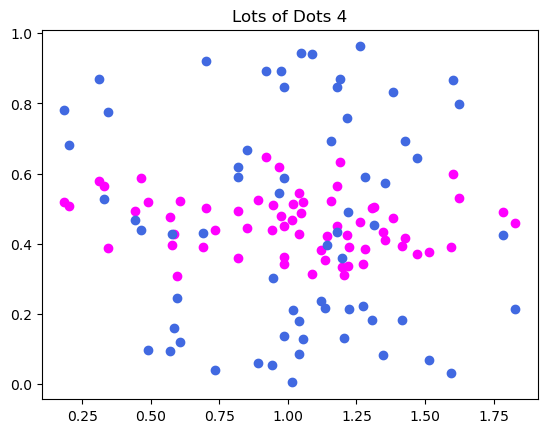

In [23]:
plt.scatter(x.T[3], my_mod_vis, c = "magenta")
plt.scatter(x.T[3], y, c = "royalblue")
plt.title("Lots of Dots 4")


## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [49]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [50]:
columns = ['Income', 'Limit', "Education", "Balance"]
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X


array([[1.48910e+01, 3.60600e+03, 1.10000e+01, 3.33000e+02, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 1.50000e+01, 9.03000e+02, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 1.10000e+01, 5.80000e+02, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 1.20000e+01, 1.38000e+02, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.30000e+01, 0.00000e+00, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 7.00000e+00, 9.66000e+02, 1.00000e+00]])

In [51]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

dot product:  [ 1.34036346e-01  6.26373011e-02 -3.43052578e-01  1.48796968e-02
  4.91302144e+01]


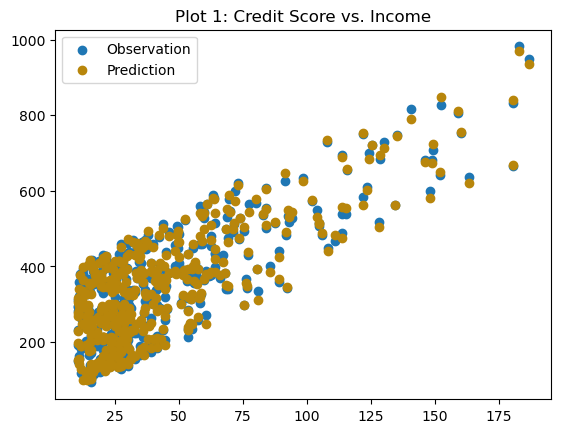

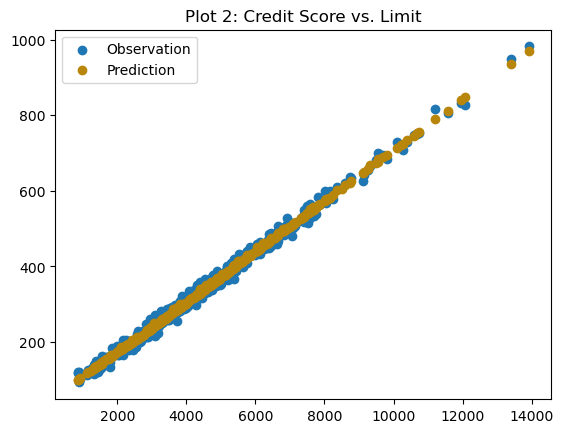

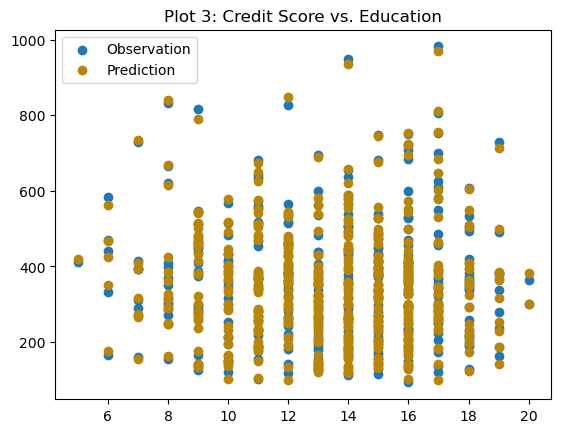

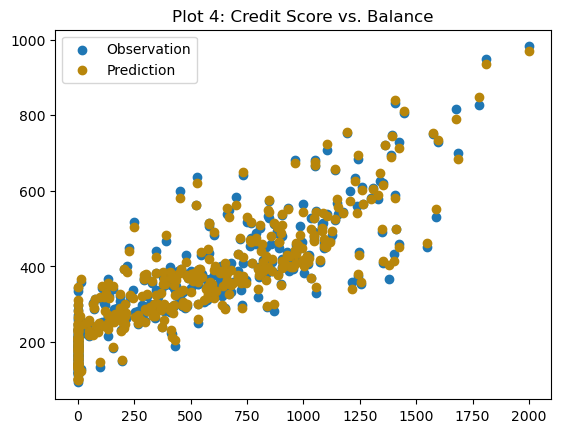

In [55]:
left = np.linalg.inv(np.dot(X.T, X))
right = np.dot(y.T, X)
print("dot product: ", np.dot(left, right))
beta = np.dot(left, right)

pred = np.dot(X, beta)

#Plot 1
plt.scatter(X.T[0], y, label = "Observation")
plt.scatter(X.T[0], pred, c='darkgoldenrod', label = "Prediction")
plt.title("Plot 1: Credit Score vs. Income")
plt.legend()
plt.show()

#Plot 2
plt.scatter(X.T[1], y, label = "Observation")
plt.scatter(X.T[1], pred, c='darkgoldenrod', label = "Prediction")
plt.title("Plot 2: Credit Score vs. Limit")
plt.legend()
plt.show()

#Plot 3
plt.scatter(X.T[2], y, label = "Observation")
plt.scatter(X.T[2], pred, c='darkgoldenrod', label = "Prediction")
plt.title("Plot 3: Credit Score vs. Education")
plt.legend()
plt.show()

#Plot 4
plt.scatter(X.T[3], y, label = "Observation")
plt.scatter(X.T[3], pred, c='darkgoldenrod', label = "Prediction")
plt.title("Plot 4: Credit Score vs. Balance")
plt.legend()
plt.show()